# **Task 8: Clustering with K-Means**
>Dataset used: Mall Customer Segmentation dataset

>https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [ ]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

## **Loading and Exploring the dataset**

---



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
df = pd.read_csv('Mall_Customers.csv')
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
 4   Cluster                 200 non-null    int32 
dtypes: int32(1), int64(3), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,2.195000
std,13.969007,26.264721,25.823522,1.332612
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,1.000000
50%,36.000000,61.500000,50.000000,2.000000
75%,49.000000,78.000000,73.000000,3.000000
max,70.000000,137.000000,99.000000,4.000000


In [ ]:
print("Checking Null values in the dataset :")
display(df.isnull().sum())
print("\nNo Null values found in the dataset.")

Checking Null values in the dataset :


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0



No Null values found in the dataset.


## **Data Cleaning & Feature Selection**

In [ ]:
# Droppping the unneccessary feature
df = df.drop('CustomerID', axis=1)
display(df.head())

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
# We'll use only numerical features for clustering
features = df.select_dtypes(include=[np.number])
print("Selected Features for Clustering:\n\n ", features.head())

Selected Features for Clustering:

     Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40


## **Feature Scaling**

In [ ]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

## **Elbow Method to find optimal K**

In [ ]:
inertia = []
K_range = range(1, 16)

In [ ]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

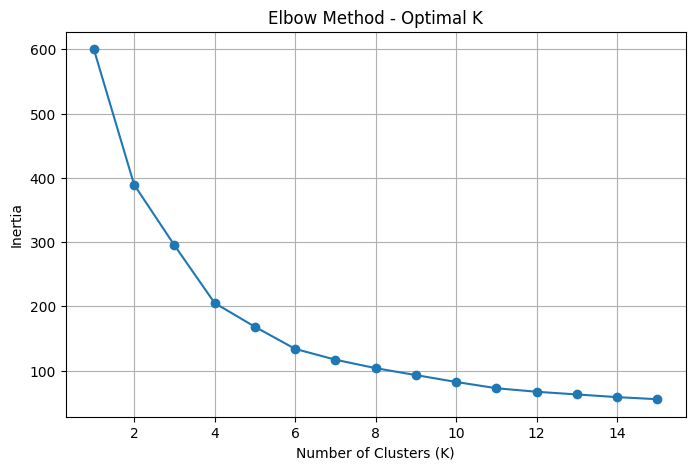

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method - Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

## **Fitting  K-Means with chosen K**

In [ ]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(features_scaled)

In [ ]:
df['Cluster'] = cluster_labels

In [ ]:
print("\nCluster Counts:\n", df['Cluster'].value_counts())


Cluster Counts:
 Cluster
1    54
4    47
2    40
3    39
0    20
Name: count, dtype: int64


## **Evaluate Clustering with Silhouette Score**

In [ ]:
sil_score = silhouette_score(features_scaled, cluster_labels)
print(f"\nSilhouette Score for K={optimal_k}: {sil_score:.4f}")


Silhouette Score for K=5: 0.4166


## **Visualizing Clusters**

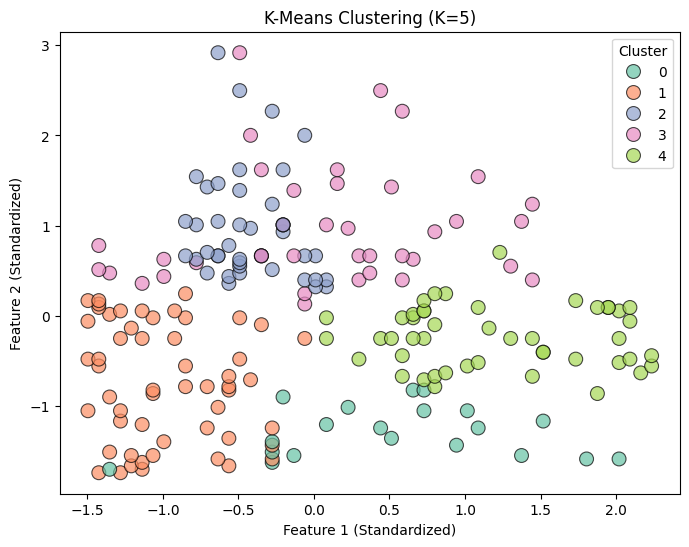

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1],
                hue=cluster_labels, palette="Set2", s=100, alpha=0.7, edgecolor="k")
plt.title(f"K-Means Clustering (K={optimal_k})")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.legend(title="Cluster")
plt.show()

## **PCA for better 2D visualization**

In [ ]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features_scaled)

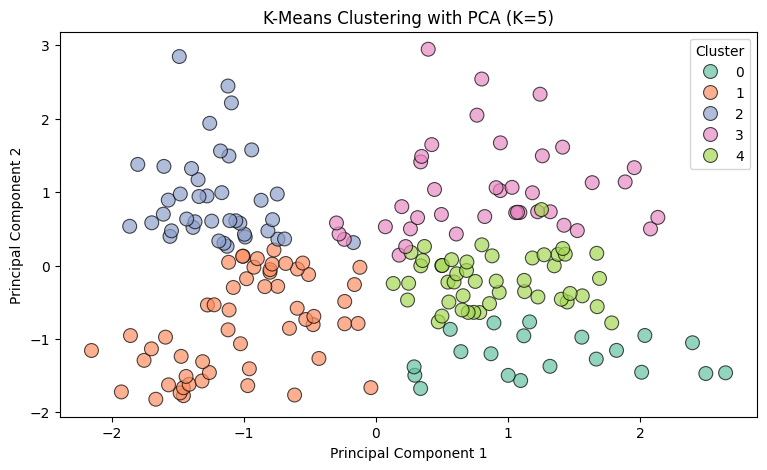

In [ ]:
plt.figure(figsize=(9,5))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1],
                hue=cluster_labels, palette="Set2", s=100, alpha=0.7, edgecolor="k")
plt.title(f"K-Means Clustering with PCA (K={optimal_k})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()